In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error


In [2]:
#Reinstates Pandas Plotting Converters to Use for Graphs
pd.plotting.register_matplotlib_converters()

In [7]:
cd Nashville Weather Data


/Users/darektidwell/Documents/Nashville Weather Data


In [ ]:
df = pd.read_csv('nashville weaher.csv')


In [ ]:
df.head()

In [ ]:
df = df.drop('STATION', axis=1)
df = df.drop('NAME', axis=1)

In [ ]:
df = df.drop('TAVG', axis=1)
df = df.rename(columns={'DATE':'ds', 'TMAX':'y'} )


In [ ]:
df['ds']= df['ds'].apply(pd.to_datetime)

In [ ]:
df = df.set_index('ds')

In [ ]:
train = df['1987':'2016']
test = df['2017':'2019']

In [ ]:
test.head()

In [ ]:
train = train.reset_index()
test = test.reset_index()
test.head()

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='ds', y='y', color='skyblue', data=train, label='Train')
sns.lineplot(x='ds', y='y', color='orange', label='Test', data=test, ax=ax)
plt.title('Daily high temperature in Nashville');

In [ ]:
train['mean_baseline'] = train['y'].mean()
test['mean_baseline']  = train['y'].mean()
print('Average daily high temperature in the train set:', train['y'].mean())

In [ ]:
train['naive_baseline'] = train['y'].shift(1).bfill()
train_last_observation = train['naive_baseline'].iloc[-1]
test['naive_baseline'] = train_last_observation

In [ ]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='ds', y='y', color='skyblue', data=train, label='Train')
sns.lineplot(x='ds', y='y', color='orange', label='Test', data=test, ax=ax)
sns.lineplot(x='ds', y='mean_baseline', color='black', data=train, label='Mean', ax=ax)
sns.lineplot(x='ds', y='mean_baseline', color='gray', data=test, label='Mean',ax=ax)
sns.lineplot(x='ds', y='naive_baseline', color='red', alpha=.5, data=train, label='Naive', ax=ax)
sns.lineplot(x='ds', y='naive_baseline', color='blue', data=test, label='Naive',ax=ax)

plt.title('Daily high temperature in Nashville');

In [31]:
test = test.fillna(method='ffill')


In [32]:
train_mae = mean_absolute_error(train['y'], train['mean_baseline'])
test_mae = mean_absolute_error(test['y'], test['mean_baseline'])
print('Train MAE, for mean baseline:', train_mae)
print('Test MAE, for mean baseline:', test_mae)

Train MAE, for mean baseline: 14.806847728414212
Test MAE, for mean baseline: 14.717613250831155


In [33]:
train_mae = mean_absolute_error(train['y'], train['naive_baseline'])
test_mae = mean_absolute_error(test['y'], test['naive_baseline'])
print('Train MAE, for naive baseline:', train_mae)
print('Test MAE, for naive baseline:', test_mae)

Train MAE, for naive baseline: 5.631608133086877
Test MAE, for naive baseline: 22.581127733026467


In [34]:
weather_model = Prophet(daily_seasonality=False)
weather_model.fit(train)
train_forecast = weather_model.predict(train)
test_forecast = weather_model.predict(test)

/Users/darektidwell/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [35]:
train_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10815,2016-12-27,72.399118,39.399439,61.610575,72.399118,72.399118,-21.325801,-21.325801,-21.325801,0.339661,0.339661,0.339661,-21.665461,-21.665461,-21.665461,0.0,0.0,0.0,51.073318
10816,2016-12-28,72.399965,39.634666,62.356069,72.399965,72.399965,-21.497190,-21.497190,-21.497190,0.286116,0.286116,0.286116,-21.783306,-21.783306,-21.783306,0.0,0.0,0.0,50.902775
10817,2016-12-29,72.400813,39.741402,62.550874,72.400813,72.400813,-21.997477,-21.997477,-21.997477,-0.097916,-0.097916,-0.097916,-21.899561,-21.899561,-21.899561,0.0,0.0,0.0,50.403336
10818,2016-12-30,72.401660,37.947410,60.757793,72.401660,72.401660,-22.570632,-22.570632,-22.570632,-0.556942,-0.556942,-0.556942,-22.013691,-22.013691,-22.013691,0.0,0.0,0.0,49.831027
10819,2016-12-31,72.402507,38.929349,62.162472,72.402507,72.402507,-22.356321,-22.356321,-22.356321,-0.231338,-0.231338,-0.231338,-22.124983,-22.124983,-22.124983,0.0,0.0,0.0,50.046186


In [36]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,72.403354,39.353203,62.322585,72.403354,72.403354,-22.167216,-22.167216,-22.167216,0.065357,0.065357,0.065357,-22.232573,-22.232573,-22.232573,0.0,0.0,0.0,50.236138
1,2017-01-02,72.404202,38.775554,61.804200,72.404202,72.404202,-22.140418,-22.140418,-22.140418,0.195062,0.195062,0.195062,-22.335480,-22.335480,-22.335480,0.0,0.0,0.0,50.263784
2,2017-01-03,72.405049,38.421894,62.686599,72.405049,72.405049,-22.092976,-22.092976,-22.092976,0.339661,0.339661,0.339661,-22.432637,-22.432637,-22.432637,0.0,0.0,0.0,50.312073
3,2017-01-04,72.405896,38.121215,62.146547,72.405896,72.405896,-22.236813,-22.236813,-22.236813,0.286116,0.286116,0.286116,-22.522929,-22.522929,-22.522929,0.0,0.0,0.0,50.169083
4,2017-01-05,72.406743,37.942939,61.730205,72.406743,72.406743,-22.703150,-22.703150,-22.703150,-0.097916,-0.097916,-0.097916,-22.605233,-22.605233,-22.605233,0.0,0.0,0.0,49.703594


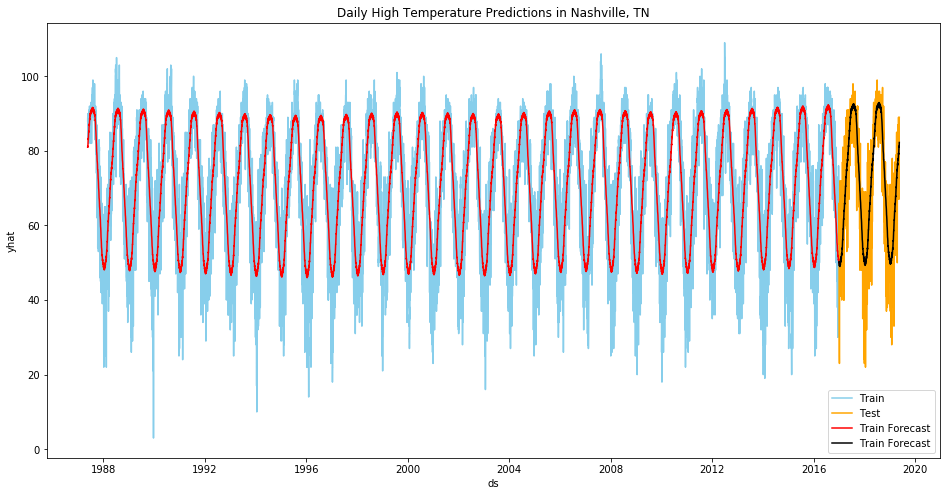

In [37]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='ds', y='y', color='skyblue', data=train, label='Train')
sns.lineplot(x='ds', y='y', color='orange', label='Test', data=test, ax=ax)
sns.lineplot(x='ds', y='yhat', color='red', label='Train Forecast', data=train_forecast, ax=ax)
sns.lineplot(x='ds', y='yhat', color='black', label='Train Forecast', data=test_forecast, ax=ax)

plt.title('Daily High Temperature Predictions in Nashville, TN');

In [38]:
train_mae = mean_absolute_error(train['y'], train_forecast['yhat'])
test_mae = mean_absolute_error(test['y'], test_forecast['yhat'])
print('Train MAE for Prophet (default params):', train_mae)
print('Test MAE for Prophet (default params):', test_mae)

Train MAE for Prophet (default params): 7.079822370723719
Test MAE for Prophet (default params): 7.678912953803708


In [51]:
weather_model2 = Prophet(daily_seasonality=False,
                        changepoint_prior_scale=4)
weather_model2.add_seasonality(name='quarterly', period=365, fourier_order=40)
weather_model2.fit(train)
train_forecast2 = weather_model2.predict(train)
test_forecast2 = weather_model2.predict(test)

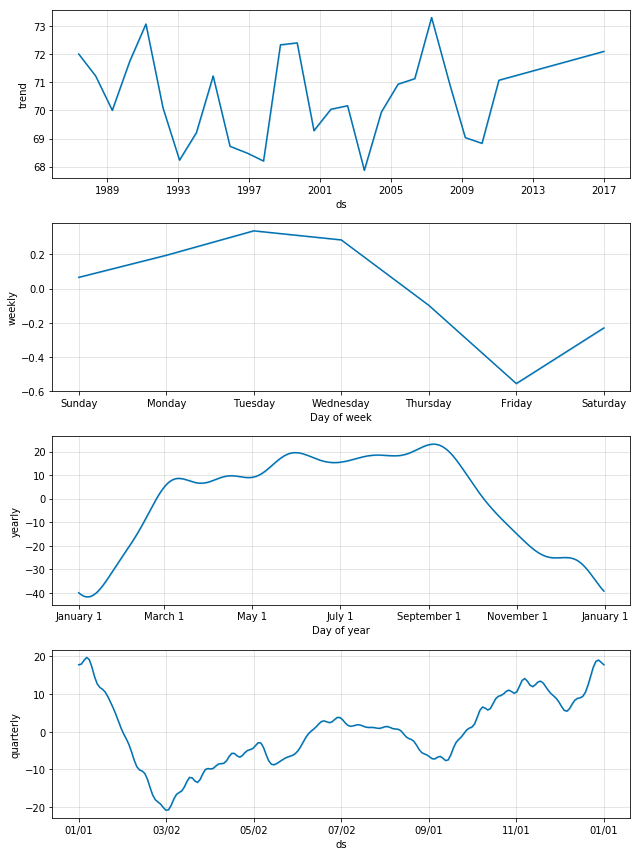

In [52]:
figx = weather_model2.plot_components(train_forecast2)

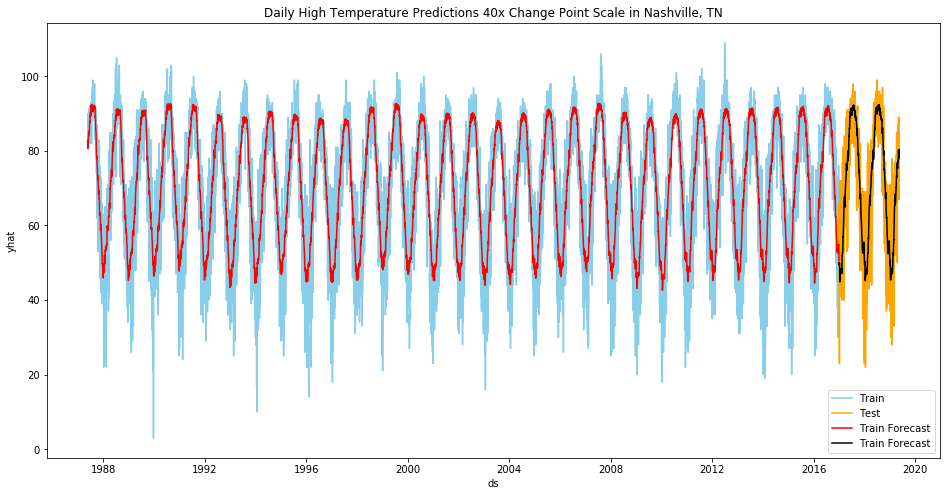

In [61]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='ds', y='y', color='skyblue', data=train, label='Train')
sns.lineplot(x='ds', y='y', color='orange', label='Test', data=test, ax=ax)
sns.lineplot(x='ds', y='yhat', color='red', label='Train Forecast', data=train_forecast2, ax=ax)
sns.lineplot(x='ds', y='yhat', color='black', label='Train Forecast', data=test_forecast2, ax=ax)

plt.title('Daily High Temperature Predictions 40x Change Point Scale in Nashville, TN');

In [56]:
train_mae2 = mean_absolute_error(train['y'], train_forecast2['yhat'])
test_mae2 = mean_absolute_error(test['y'], test_forecast2['yhat'])
print('Train MAE for Prophet (default params):', train_mae2)
print('Test MAE for Prophet (default params):', test_mae2)

Train MAE for Prophet (default params): 6.968400610067876
Test MAE for Prophet (default params): 7.869119107541896


In [46]:
from fbprophet.diagnostics import cross_validation


In [57]:
df_cv = cross_validation(weather_model2, initial='1460 days', 
                         horizon='730 days', period='365 days')

INFO:fbprophet:Making 24 forecasts with cutoffs between 1992-01-07 00:00:00 and 2015-01-01 00:00:00
/Users/darektidwell/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [58]:
df_cv.describe(exclude='number')

,ds,cutoff
count,17520,17520
unique,9125,24
top,2005-05-29 00:00:00,2012-01-02 00:00:00
freq,2,730
first,1992-01-08 00:00:00,1992-01-07 00:00:00
last,2016-12-31 00:00:00,2015-01-01 00:00:00


In [59]:
from fbprophet.diagnostics import performance_metrics
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,coverage
0,73 days,169.458478,13.017622,10.615023,0.237622,0.590183
1,74 days,169.754347,13.028981,10.627173,0.236873,0.590753
2,75 days,171.055528,13.078820,10.669578,0.236538,0.589041
3,76 days,171.538212,13.097260,10.663917,0.235570,0.590753
4,77 days,171.916737,13.111702,10.673015,0.235225,0.590183


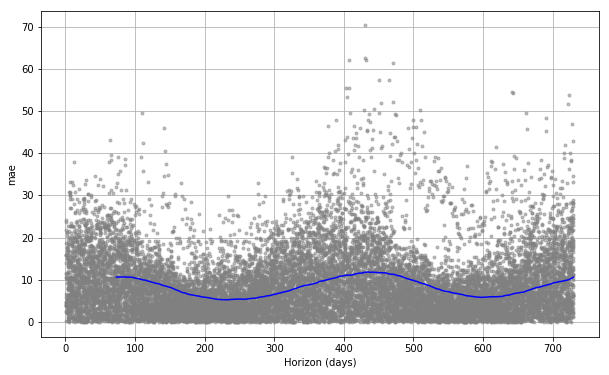

In [60]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [62]:
weather_model3 = Prophet(daily_seasonality=False,
                        changepoint_prior_scale=4)
weather_model3.add_seasonality(name='quarterly', period=365, fourier_order=40)
weather_model3.fit(train)
train_forecast3 = weather_model2.predict(train)
test_forecast3 = weather_model2.predict(test)

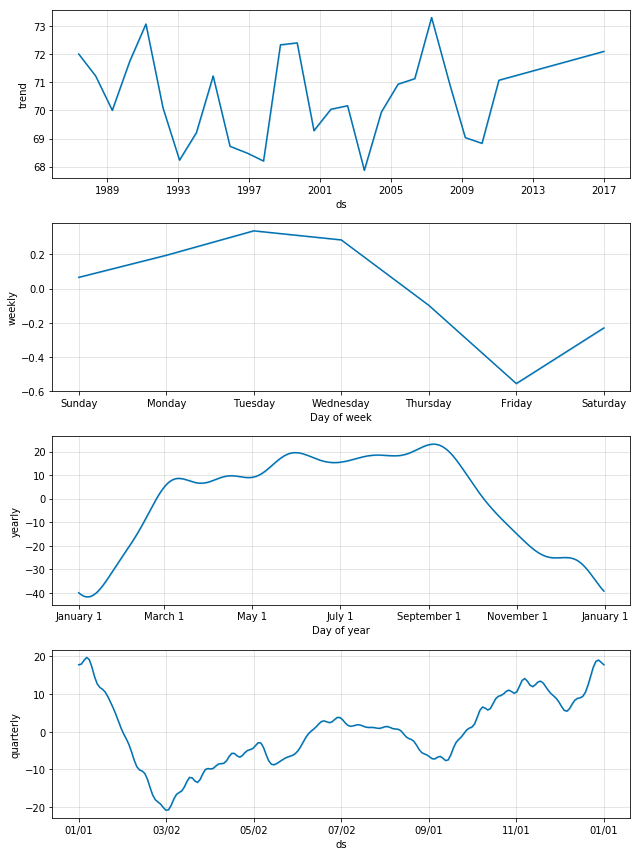

In [63]:
figy = weather_model2.plot_components(train_forecast2)

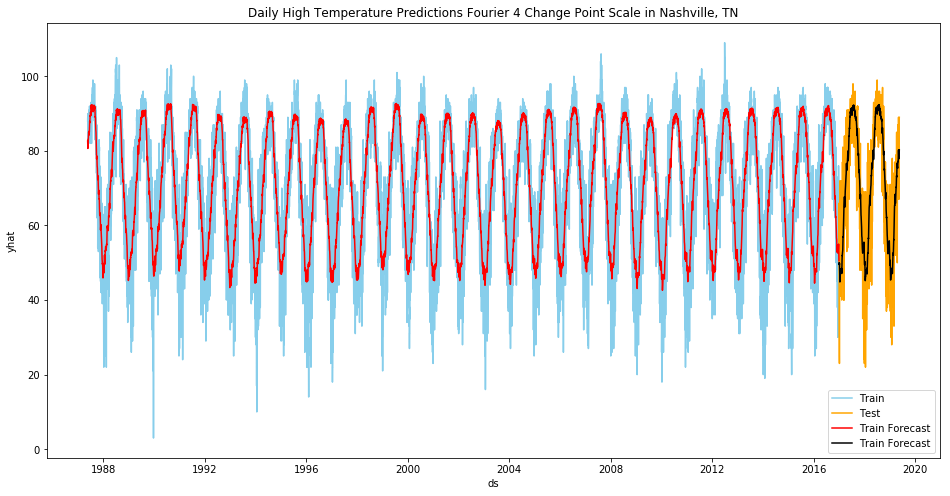

In [64]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='ds', y='y', color='skyblue', data=train, label='Train')
sns.lineplot(x='ds', y='y', color='orange', label='Test', data=test, ax=ax)
sns.lineplot(x='ds', y='yhat', color='red', label='Train Forecast', data=train_forecast3, ax=ax)
sns.lineplot(x='ds', y='yhat', color='black', label='Train Forecast', data=test_forecast3, ax=ax)

plt.title('Daily High Temperature Predictions Fourier 4 Change Point Scale in Nashville, TN');

In [65]:
train_mae3 = mean_absolute_error(train['y'], train_forecast3['yhat'])
test_mae3 = mean_absolute_error(test['y'], test_forecast3['yhat'])
print('Train MAE for Prophet (default params):', train_mae3)
print('Test MAE for Prophet (default params):', test_mae3)

Train MAE for Prophet (default params): 6.968400610067876
Test MAE for Prophet (default params): 7.869119107541896


In [66]:
df_cv2 = cross_validation(weather_model3, initial='1460 days', 
                         horizon='730 days', period='365 days')

INFO:fbprophet:Making 24 forecasts with cutoffs between 1992-01-07 00:00:00 and 2015-01-01 00:00:00
/Users/darektidwell/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [67]:
df_cv2.describe(exclude='number')

,ds,cutoff
count,17520,17520
unique,9125,24
top,2005-05-29 00:00:00,2012-01-02 00:00:00
freq,2,730
first,1992-01-08 00:00:00,1992-01-07 00:00:00
last,2016-12-31 00:00:00,2015-01-01 00:00:00


In [68]:
performance_metrics(df_cv2).head()

,horizon,mse,rmse,mae,mape,coverage
0,73 days,169.458478,13.017622,10.615023,0.237622,0.589612
1,74 days,169.754347,13.028981,10.627173,0.236873,0.588470
2,75 days,171.055528,13.078820,10.669578,0.236538,0.586758
3,76 days,171.538212,13.097260,10.663917,0.235570,0.587900
4,77 days,171.916737,13.111702,10.673015,0.235225,0.587329


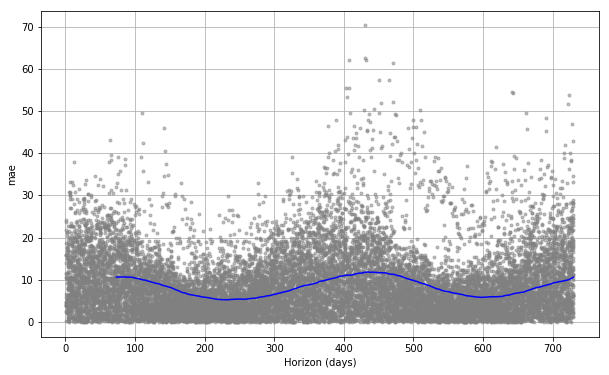

In [69]:
figz = plot_cross_validation_metric(df_cv2, metric='mae')